In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.concat([pd.read_csv('train.csv'), pd.read_csv('test.csv')])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None


In [3]:
print(df.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450  


In [4]:
print(df.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450  


In [5]:
greeting = [x.split(',')[1].split('.')[0].strip() for x in df.Name.values]
df["greeting"] = greeting
print(df.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket greeting  
0       3    male      1       0.0         A/5 21171       Mr  
1       1  female      1       1.0          PC 17599      Mrs  
2       3  female      0       1.0  STON/O2. 3101282     Miss  
3       1  female      1       1.0            113803      Mrs  
4       3   

In [6]:
df['greeting'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
the Countess      1
Don               1
Lady              1
Sir               1
Jonkheer          1
Dona              1
Capt              1
Name: greeting, dtype: int64

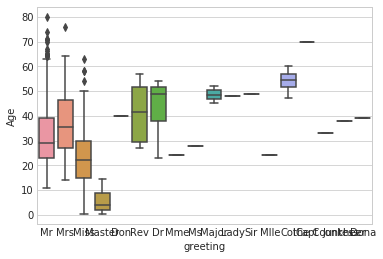

In [7]:
sns.set_style("whitegrid")
sns.boxplot(x=df.greeting, y=df.Age)

In [8]:
df[df['greeting'] == 'Jonkheer']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,greeting
822,38.0,NaN,S,0.0,"Reuchlin, Jonkheer. John George",0,823,1,male,0,0.0,19972,Jonkheer


In [9]:
df['greeting'] = df['greeting'].replace('Jonkheer', 'Mr')

In [10]:
df['greeting'] = df['greeting'].replace('Capt', 'Mr')
df['greeting'] = df['greeting'].replace('Dona', 'Mrs')
df['greeting'] = df['greeting'].replace('Don', 'Mr')
df['greeting'] = df['greeting'].replace('Sir', 'Mr')
df['greeting'] = df['greeting'].replace('Lady', 'Mrs')

In [11]:
df[df['greeting'] == 'the Countess']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,greeting
759,33.0,B77,S,86.5,"Rothes, the Countess. of (Lucy Noel Martha Dye...",0,760,1,female,0,1.0,110152,the Countess


In [12]:
df['greeting'] = df['greeting'].replace('the Countess', 'Miss')

In [13]:
df[df['greeting'] == 'Mme']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,greeting
369,24.0,B35,C,69.3,"Aubart, Mme. Leontine Pauline",0,370,1,female,0,1.0,PC 17477,Mme


In [14]:
df['greeting'] = df['greeting'].replace('Mme', 'Miss')

In [15]:
df['greeting'].value_counts()

Mr        761
Miss      262
Mrs       199
Master     61
Dr          8
Rev         8
Col         4
Major       2
Ms          2
Mlle        2
Name: greeting, dtype: int64

In [16]:
df[df['greeting'] == 'Mlle']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,greeting
641,24.0,B35,C,69.3000,"Sagesser, Mlle. Emma",0,642,1,female,0,1.0,PC 17477,Mlle
710,24.0,C90,C,49.5042,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",0,711,1,female,0,1.0,PC 17482,Mlle


In [17]:
df['greeting'] = df['greeting'].replace('Mlle', 'Miss')

In [18]:
df[df['greeting'] == 'Ms']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,greeting
443,28.0,NaN,S,13.00,"Reynaldo, Ms. Encarnacion",0,444,2,female,0,1.0,230434,Ms
88,NaN,NaN,Q,7.75,"O'Donoghue, Ms. Bridget",0,980,3,female,0,NaN,364856,Ms


In [19]:
df['greeting'] = df['greeting'].replace('Ms', 'Miss')

In [20]:
df[df['greeting'] == 'Major']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,greeting
449,52.0,C104,S,30.50,"Peuchen, Major. Arthur Godfrey",0,450,1,male,0,1.0,113786,Major
536,45.0,B38,S,26.55,"Butt, Major. Archibald Willingham",0,537,1,male,0,0.0,113050,Major


In [21]:
df[df['greeting'] == 'Major']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,greeting
449,52.0,C104,S,30.50,"Peuchen, Major. Arthur Godfrey",0,450,1,male,0,1.0,113786,Major
536,45.0,B38,S,26.55,"Butt, Major. Archibald Willingham",0,537,1,male,0,0.0,113050,Major


In [22]:
df['greeting'] = df['greeting'].replace('Major', 'Mr')

In [23]:
table = df.pivot_table(values='Age', \
                       index=['greeting'], \
                       columns=['Pclass', 'Sex'], \
                       aggfunc=np.median)
print(table)

Pclass        1            2            3      
Sex      female  male female  male female  male
greeting                                       
Col         NaN  54.5    NaN   NaN    NaN   NaN
Dr         49.0  47.0    NaN  38.5    NaN   NaN
Master      NaN   6.0    NaN   2.0    NaN   6.0
Miss       30.0   NaN   20.0   NaN   18.0   NaN
Mr          NaN  42.0    NaN  30.0    NaN  26.0
Mrs        45.0   NaN   30.5   NaN   31.0   NaN
Rev         NaN   NaN    NaN  41.5    NaN   NaN


In [24]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,greeting
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr


In [25]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,greeting
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs


In [26]:
df.sort_values(by='Ticket')[50:70]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,greeting
74,35.0,C130,C,211.5000,"Geiger, Miss. Amalie",0,966,1,female,0,NaN,113503,Miss
377,27.0,C82,C,211.5000,"Widener, Mr. Harry Elkins",2,378,1,male,0,0.0,113503,Mr
166,NaN,E33,S,55.0000,"Chibnall, Mrs. (Edith Martha Bowerman)",1,167,1,female,0,1.0,113505,Mrs
356,22.0,E33,S,55.0000,"Bowerman, Miss. Elsie Edith",1,357,1,female,0,1.0,113505,Miss
26,22.0,B36,C,61.9792,"Ostby, Miss. Helene Ragnhild",1,918,1,female,0,NaN,113509,Miss
54,65.0,B30,C,61.9792,"Ostby, Mr. Engelhart Cornelius",1,55,1,male,0,0.0,113509,Mr
351,NaN,C128,S,35.0000,"Williams-Lambert, Mr. Fletcher Fellows",0,352,1,male,0,0.0,113510,Mr
252,62.0,C87,S,26.5500,"Stead, Mr. William Thomas",0,253,1,male,0,0.0,113514,Mr
829,62.0,B28,NaN,80.0000,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs
61,38.0,B28,NaN,80.0000,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss


In [27]:
df['Embarked'].fillna('S', inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
greeting       1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 183.2+ KB


In [29]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,greeting
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr


In [30]:
df.sort_values(by='Ticket', ascending=False)[440:460]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,greeting
198,NaN,NaN,Q,7.7500,"Madigan, Miss. Margaret ""Maggie""",0,199,3,female,0,1.0,370370,Miss
116,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,117,3,male,0,0.0,370369,Mr
227,NaN,NaN,Q,7.7500,"McNeill, Miss. Bridget",0,1119,3,female,0,NaN,370368,Miss
186,NaN,NaN,Q,15.5000,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",0,187,3,female,1,1.0,370365,Mrs
364,NaN,NaN,Q,15.5000,"O'Brien, Mr. Thomas",0,365,3,male,1,0.0,370365,Mr
424,18.0,NaN,S,20.2125,"Rosblom, Mr. Viktor Richard",1,425,3,male,1,0.0,370129,Mr
254,41.0,NaN,S,20.2125,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",2,255,3,female,0,0.0,370129,Mrs
284,2.0,NaN,S,20.2125,"Rosblom, Miss. Salli Helena",1,1176,3,female,1,NaN,370129,Miss
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr
230,35.0,C83,S,83.4750,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",0,231,1,female,1,1.0,36973,Mrs


In [31]:
fare_mean = df[(df.Age>55)&(df.Pclass==3)&(df.Sex=='male')]['Fare'].mean()
print(fare_mean)

7.46875


In [32]:
df["Fare"].fillna(fare_mean, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
greeting       1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 183.2+ KB


In [34]:
df["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [35]:
sex_dummies = pd.get_dummies(df["Sex"])
print(sex_dummies.info())
print(sex_dummies[:5])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 2 columns):
female    1309 non-null uint8
male      1309 non-null uint8
dtypes: uint8(2)
memory usage: 52.8 KB
None
   female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1


In [36]:
df['female'] = sex_dummies['female']
df.drop('Sex', axis=1, inplace=True)

In [37]:
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,greeting,female
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,0,NaN,A.5. 3236,Mr,0
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,0,NaN,PC 17758,Mrs,1
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,0,NaN,SOTON/O.Q. 3101262,Mr,0
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,0,NaN,359309,Mr,0
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,1,NaN,2668,Master,0


In [38]:
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

In [39]:
df.tail()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,SibSp,Survived,greeting,female
413,NaN,S,8.0500,0,1305,3,0,NaN,Mr,0
414,39.0,C,108.9000,0,1306,1,0,NaN,Mrs,1
415,38.5,S,7.2500,0,1307,3,0,NaN,Mr,0
416,NaN,S,8.0500,0,1308,3,0,NaN,Mr,0
417,NaN,C,22.3583,1,1309,3,1,NaN,Master,0


In [40]:
df.Embarked.value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [41]:
df.greeting.value_counts()

Mr        763
Miss      266
Mrs       199
Master     61
Dr          8
Rev         8
Col         4
Name: greeting, dtype: int64

In [42]:
def get_dummie(data, column):
    """Convert to binar number of categories"""
    
    df_dummie = pd.get_dummies(df[column][:], prefix=column)
    df_dummie = pd.concat([df[:],df_dummie[:]], axis=1)
    
    return (df_dummie)

In [43]:
x = df.loc[:,:]
df = get_dummie(x, "Embarked")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1046 non-null float64
Embarked       1309 non-null object
Fare           1309 non-null float64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
greeting       1309 non-null object
female         1309 non-null uint8
Embarked_C     1309 non-null uint8
Embarked_Q     1309 non-null uint8
Embarked_S     1309 non-null uint8
dtypes: float64(3), int64(4), object(2), uint8(4)
memory usage: 107.4+ KB


In [45]:
x = df.loc[:,:]
df = get_dummie(x, 'greeting')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 20 columns):
Age                1046 non-null float64
Embarked           1309 non-null object
Fare               1309 non-null float64
Parch              1309 non-null int64
PassengerId        1309 non-null int64
Pclass             1309 non-null int64
SibSp              1309 non-null int64
Survived           891 non-null float64
greeting           1309 non-null object
female             1309 non-null uint8
Embarked_C         1309 non-null uint8
Embarked_Q         1309 non-null uint8
Embarked_S         1309 non-null uint8
greeting_Col       1309 non-null uint8
greeting_Dr        1309 non-null uint8
greeting_Master    1309 non-null uint8
greeting_Miss      1309 non-null uint8
greeting_Mr        1309 non-null uint8
greeting_Mrs       1309 non-null uint8
greeting_Rev       1309 non-null uint8
dtypes: float64(3), int64(4), object(2), uint8(11)
memory usage: 116.3+ KB


In [47]:
df.drop(['Embarked', 'greeting'], axis=1, inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 18 columns):
Age                1046 non-null float64
Fare               1309 non-null float64
Parch              1309 non-null int64
PassengerId        1309 non-null int64
Pclass             1309 non-null int64
SibSp              1309 non-null int64
Survived           891 non-null float64
female             1309 non-null uint8
Embarked_C         1309 non-null uint8
Embarked_Q         1309 non-null uint8
Embarked_S         1309 non-null uint8
greeting_Col       1309 non-null uint8
greeting_Dr        1309 non-null uint8
greeting_Master    1309 non-null uint8
greeting_Miss      1309 non-null uint8
greeting_Mr        1309 non-null uint8
greeting_Mrs       1309 non-null uint8
greeting_Rev       1309 non-null uint8
dtypes: float64(3), int64(4), uint8(11)
memory usage: 95.9 KB


In [49]:
train_age_df = df[df.Age.notnull()]
print(train_age_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 415
Data columns (total 18 columns):
Age                1046 non-null float64
Fare               1046 non-null float64
Parch              1046 non-null int64
PassengerId        1046 non-null int64
Pclass             1046 non-null int64
SibSp              1046 non-null int64
Survived           714 non-null float64
female             1046 non-null uint8
Embarked_C         1046 non-null uint8
Embarked_Q         1046 non-null uint8
Embarked_S         1046 non-null uint8
greeting_Col       1046 non-null uint8
greeting_Dr        1046 non-null uint8
greeting_Master    1046 non-null uint8
greeting_Miss      1046 non-null uint8
greeting_Mr        1046 non-null uint8
greeting_Mrs       1046 non-null uint8
greeting_Rev       1046 non-null uint8
dtypes: float64(3), int64(4), uint8(11)
memory usage: 76.6 KB
None


In [50]:
test_age_df = df[df.Age.isnull()]
print(test_age_df.shape)

(263, 18)


In [51]:
train_age_df.Age = (train_age_df.loc[:,'Age']+1).apply(np.log)

/home/user/.local/lib/python2.7/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [53]:
y = train_age_df.Age.values
print("Shape of target_age is:{}".format(y.shape))
X = train_age_df.drop(['Age', 'PassengerId', 'Survived'], axis=1)
print("Shape of train_age is:{}".format(X.shape))
test_age = test_age_df.drop(['Age', 'PassengerId', 'Survived'], axis=1)
print("Shape of test_age is:{}".format(test_age.shape))

Shape of target_age is:(1046,)
Shape of train_age is:(1046, 15)
Shape of test_age is:(263, 15)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

In [55]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_pred_scaled = scaler.transform(test_age)

In [56]:
print("Shape X_scaled: {0}. Shape y: {1}. Shape X_pred_scaled : {2}"\
      .format(X_scaled.shape, y.shape, X_pred_scaled.shape))
print("X_scaled[:10]: {0}.\n\n\n y[:10]:{1}.\n\n\n X_pred_scaled[:10]:{2}" \
    .format(X_scaled[:10], y[:10], X_pred_scaled[:10]))

Shape X_scaled: (1046, 15). Shape y: (1046,). Shape X_pred_scaled : (263, 15)
X_scaled[:10]: [[ 0.01415106  0.          1.          0.125       0.          0.          0.
   1.          0.          0.          0.          0.          1.          0.
   0.        ]
 [ 0.13913574  0.          0.          0.125       1.          1.          0.
   0.          0.          0.          0.          0.          0.          1.
   0.        ]
 [ 0.01546857  0.          1.          0.          1.          0.          0.
   1.          0.          0.          0.          1.          0.          0.
   0.        ]
 [ 0.1036443   0.          0.          0.125       1.          0.          0.
   1.          0.          0.          0.          0.          0.          1.
   0.        ]
 [ 0.01571255  0.          1.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          1.          0.
   0.        ]
 [ 0.10122886  0.          0.          0.          0

In [57]:
param_grid = {'n_estimators': [n for n in range(10, 110, 10)],
              'max_depth'   : [d for d in range(2,7)],
              'max_features': [f for f in range(2, 6)]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': [2, 3, 4, 5], 'max_depth': [2, 3, 4, 5, 6]}


In [58]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42, 
                                                n_jobs=-1), param_grid, cv=5)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=21)

In [60]:
grid_search.fit(X_train, y_train)
print("Test set score: {:.5f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.64516
Best parameters: {'max_features': 5, 'n_estimators': 100, 'max_depth': 6}
Best cross-validation score: 0.60809
Best estimator:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)


In [61]:
regressor = grid_search.best_estimator_

In [62]:
regressor.fit(X_train, y_train)
print("Accuracy on training set: {:.5f}".format(regressor.score(X_train, y_train)))
print("Accuracy on test set: {:.5f}".format(regressor.score(X_test, y_test)))

Accuracy on training set: 0.72918
Accuracy on test set: 0.64516


In [63]:
kfold = KFold(n_splits=5)
scores = cross_val_score(regressor, X, y, cv=kfold)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.5f}".format(scores.mean()))

Cross-validation scores: [ 0.70735775  0.61427243  0.58342689  0.64787519  0.60195969]
Average cross-validation score: 0.63098


In [64]:
predicted_age = regressor.predict(X_pred_scaled)
print(predicted_age[:20])

[ 3.45613138  3.44940947  3.32117083  3.33193495  3.16538879  3.34620288
  3.58812145  3.18075461  3.33348317  3.3479933   3.34620288  3.47253245
  3.18075461  3.26484808  3.69966663  3.6970429   1.72633413  3.34620288
  3.34620288  3.17898983]


In [65]:
predicted_age = np.exp(predicted_age[:]) - 1
predicted_age = np.round(predicted_age, 2)
print(predicted_age[:20])

[ 30.69  30.48  26.69  26.99  22.7   27.39  35.17  23.06  27.04  27.45
  27.39  31.22  23.06  25.18  39.43  39.33   4.62  27.39  27.39  23.02]


In [66]:
predicted_age.shape

(263,)

In [67]:
df[df.Age.isnull()].values.shape

(263, 18)

In [68]:
test_age_df["Age"] = predicted_age
test_age_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 5 to 417
Data columns (total 18 columns):
Age                263 non-null float64
Fare               263 non-null float64
Parch              263 non-null int64
PassengerId        263 non-null int64
Pclass             263 non-null int64
SibSp              263 non-null int64
Survived           177 non-null float64
female             263 non-null uint8
Embarked_C         263 non-null uint8
Embarked_Q         263 non-null uint8
Embarked_S         263 non-null uint8
greeting_Col       263 non-null uint8
greeting_Dr        263 non-null uint8
greeting_Master    263 non-null uint8
greeting_Miss      263 non-null uint8
greeting_Mr        263 non-null uint8
greeting_Mrs       263 non-null uint8
greeting_Rev       263 non-null uint8
dtypes: float64(3), int64(4), uint8(11)
memory usage: 19.3 KB


/home/user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
test_age_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 5 to 417
Data columns (total 18 columns):
Age                263 non-null float64
Fare               263 non-null float64
Parch              263 non-null int64
PassengerId        263 non-null int64
Pclass             263 non-null int64
SibSp              263 non-null int64
Survived           177 non-null float64
female             263 non-null uint8
Embarked_C         263 non-null uint8
Embarked_Q         263 non-null uint8
Embarked_S         263 non-null uint8
greeting_Col       263 non-null uint8
greeting_Dr        263 non-null uint8
greeting_Master    263 non-null uint8
greeting_Miss      263 non-null uint8
greeting_Mr        263 non-null uint8
greeting_Mrs       263 non-null uint8
greeting_Rev       263 non-null uint8
dtypes: float64(3), int64(4), uint8(11)
memory usage: 19.3 KB


In [70]:
train_age_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 415
Data columns (total 18 columns):
Age                1046 non-null float64
Fare               1046 non-null float64
Parch              1046 non-null int64
PassengerId        1046 non-null int64
Pclass             1046 non-null int64
SibSp              1046 non-null int64
Survived           714 non-null float64
female             1046 non-null uint8
Embarked_C         1046 non-null uint8
Embarked_Q         1046 non-null uint8
Embarked_S         1046 non-null uint8
greeting_Col       1046 non-null uint8
greeting_Dr        1046 non-null uint8
greeting_Master    1046 non-null uint8
greeting_Miss      1046 non-null uint8
greeting_Mr        1046 non-null uint8
greeting_Mrs       1046 non-null uint8
greeting_Rev       1046 non-null uint8
dtypes: float64(3), int64(4), uint8(11)
memory usage: 76.6 KB


In [71]:
df = pd.concat([train_age_df, test_age_df])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 18 columns):
Age                1309 non-null float64
Fare               1309 non-null float64
Parch              1309 non-null int64
PassengerId        1309 non-null int64
Pclass             1309 non-null int64
SibSp              1309 non-null int64
Survived           891 non-null float64
female             1309 non-null uint8
Embarked_C         1309 non-null uint8
Embarked_Q         1309 non-null uint8
Embarked_S         1309 non-null uint8
greeting_Col       1309 non-null uint8
greeting_Dr        1309 non-null uint8
greeting_Master    1309 non-null uint8
greeting_Miss      1309 non-null uint8
greeting_Mr        1309 non-null uint8
greeting_Mrs       1309 non-null uint8
greeting_Rev       1309 non-null uint8
dtypes: float64(3), int64(4), uint8(11)
memory usage: 95.9 KB


In [72]:
train = df[(df.Survived == 1) | (df.Survived == 0)]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 888
Data columns (total 18 columns):
Age                891 non-null float64
Fare               891 non-null float64
Parch              891 non-null int64
PassengerId        891 non-null int64
Pclass             891 non-null int64
SibSp              891 non-null int64
Survived           891 non-null float64
female             891 non-null uint8
Embarked_C         891 non-null uint8
Embarked_Q         891 non-null uint8
Embarked_S         891 non-null uint8
greeting_Col       891 non-null uint8
greeting_Dr        891 non-null uint8
greeting_Master    891 non-null uint8
greeting_Miss      891 non-null uint8
greeting_Mr        891 non-null uint8
greeting_Mrs       891 non-null uint8
greeting_Rev       891 non-null uint8
dtypes: float64(3), int64(4), uint8(11)
memory usage: 65.3 KB


In [73]:
survived = train['Survived'][:].values
print(survived.shape)
print(survived[:10])

(891,)
[ 0.  1.  1.  1.  0.  0.  0.  1.  1.  1.]


In [74]:
train.drop(['PassengerId', 'Survived'], axis=1, inplace=True)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 888
Data columns (total 16 columns):
Age                891 non-null float64
Fare               891 non-null float64
Parch              891 non-null int64
Pclass             891 non-null int64
SibSp              891 non-null int64
female             891 non-null uint8
Embarked_C         891 non-null uint8
Embarked_Q         891 non-null uint8
Embarked_S         891 non-null uint8
greeting_Col       891 non-null uint8
greeting_Dr        891 non-null uint8
greeting_Master    891 non-null uint8
greeting_Miss      891 non-null uint8
greeting_Mr        891 non-null uint8
greeting_Mrs       891 non-null uint8
greeting_Rev       891 non-null uint8
dtypes: float64(2), int64(3), uint8(11)
memory usage: 51.3 KB
None


/home/user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
test = df[(df.Survived != 1) & (df.Survived != 0)]
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 18 columns):
Age                418 non-null float64
Fare               418 non-null float64
Parch              418 non-null int64
PassengerId        418 non-null int64
Pclass             418 non-null int64
SibSp              418 non-null int64
Survived           0 non-null float64
female             418 non-null uint8
Embarked_C         418 non-null uint8
Embarked_Q         418 non-null uint8
Embarked_S         418 non-null uint8
greeting_Col       418 non-null uint8
greeting_Dr        418 non-null uint8
greeting_Master    418 non-null uint8
greeting_Miss      418 non-null uint8
greeting_Mr        418 non-null uint8
greeting_Mrs       418 non-null uint8
greeting_Rev       418 non-null uint8
dtypes: float64(3), int64(4), uint8(11)
memory usage: 30.6 KB


In [76]:
PassId = test.PassengerId[:]
print(type(PassId))
print(PassId[:5])

<class 'pandas.core.series.Series'>
0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64


In [77]:
test.drop(['PassengerId', 'Survived'], axis=1, inplace=True)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 16 columns):
Age                418 non-null float64
Fare               418 non-null float64
Parch              418 non-null int64
Pclass             418 non-null int64
SibSp              418 non-null int64
female             418 non-null uint8
Embarked_C         418 non-null uint8
Embarked_Q         418 non-null uint8
Embarked_S         418 non-null uint8
greeting_Col       418 non-null uint8
greeting_Dr        418 non-null uint8
greeting_Master    418 non-null uint8
greeting_Miss      418 non-null uint8
greeting_Mr        418 non-null uint8
greeting_Mrs       418 non-null uint8
greeting_Rev       418 non-null uint8
dtypes: float64(2), int64(3), uint8(11)
memory usage: 24.1 KB
None


/home/user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
X = train.values
y = survived
X_pred = test.values

In [79]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_pred_scaled = scaler.transform(X_pred)

print("Shape X_scaled: {0}. Shape y: {1}. Shape X_pred_scaled : {2}"\
      .format(X_scaled.shape, y.shape, X_pred_scaled.shape))
print("X_scaled[:10]: {0}.\n\n\n y[:10]:{1}.\n\n\n X_pred_scaled[:10]:{2}" \
    .format(X_scaled[:10], y[:10], X_pred_scaled[:10]))

Shape X_scaled: (891, 16). Shape y: (891,). Shape X_pred_scaled : (418, 16)
X_scaled[:10]: [[ 0.06761063  0.01415106  0.          1.          0.125       0.          0.
   0.          1.          0.          0.          0.          0.          1.
   0.          0.        ]
 [ 0.08043111  0.13913574  0.          0.          0.125       1.          1.
   0.          0.          0.          0.          0.          0.          0.
   1.          0.        ]
 [ 0.07150345  0.01546857  0.          1.          0.          1.          0.
   0.          1.          0.          0.          0.          1.          0.
   0.          0.        ]
 [ 0.07848783  0.1036443   0.          0.          0.125       1.          0.
   0.          1.          0.          0.          0.          0.          0.
   1.          0.        ]
 [ 0.07848783  0.01571255  0.          1.          0.          0.          0.
   0.          1.          0.          0.          0.          0.          1.
   0.          0.    

In [80]:
param_grid = {'n_estimators': [n for n in range(10, 110, 10)],
              'max_depth'   : [d for d in range(2,5)],
              'max_features': [f for f in range(2, 9)]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': [2, 3, 4, 5, 6, 7, 8], 'max_depth': [2, 3, 4]}


In [81]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, 
                                                n_jobs=-1), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=21)
grid_search.fit(X_train, y_train)
print("Test set score: {:.5f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.82511
Best parameters: {'max_features': 7, 'n_estimators': 40, 'max_depth': 3}
Best cross-validation score: 0.82635
Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


In [82]:
forest = grid_search.best_estimator_

forest.fit(X_train, y_train)
print("Accuracy on training set: {:.5f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.5f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.83084
Accuracy on test set: 0.82511


In [83]:
kfold = KFold(n_splits=5)
scores = cross_val_score(forest, X, y, cv=kfold)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.5f}".format(scores.mean()))

Cross-validation scores: [ 0.82681564  0.79775281  0.7752809   0.8258427   0.8258427 ]
Average cross-validation score: 0.81031


In [84]:
submission = pd.read_csv('gender_submission.csv')
submission.iloc[:, 1] = forest.predict(X_pred_scaled)
submission.to_csv('random_forest_clf_titanic_subm.csv', index=False)